<a href="https://colab.research.google.com/github/umair-hassan2/Assignment-Contact-App/blob/master/Training_LeNet_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
BATCH_SIZE=100
TOTAL_EPOCHS=10
MODEL_PATH="./cifar10_cnn.pth"

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ])

In [6]:
test_data = torchvision.datasets.CIFAR10(
    train=False,
    root="cifar10/data",
    transform=transform,
    download=True
)

train_data = torchvision.datasets.CIFAR10(
    train=True,
    root="cifar10/data",
    transform=transform,
    download=True
)

100%|██████████| 170M/170M [00:05<00:00, 33.5MB/s]


In [7]:
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
classes = test_data.classes

In [8]:
def print_dataset_info(dataset, name="Dataset"):
    """
    Prints information about a dataset including total number of samples and image dimensions.

    Args:
        dataset (Union[np.ndarray, torch.Tensor]): The dataset, assumed to be in shape (N, C, H, W) or (N, H, W, C).
        name (str): A label for the dataset (e.g., 'Train', 'Test').
    """
    import torch
    import numpy as np

    if isinstance(dataset, (torch.Tensor, np.ndarray)):
        shape = dataset.shape
        if len(shape) != 4:
            print(f"{name} data has shape {shape} — expected 4D data (N, C/H, H/W, C).")
            return

        n_samples = shape[0]
        dims = "x".join(map(str, shape[1:]))
        print(f"{name} data has {n_samples} samples with dimensions = {dims}")
    else:
        print(f"Unsupported dataset type: {type(dataset)}")

In [9]:
print_dataset_info(test_data.data, "Test")
print_dataset_info(train_data.data, "Train")

Test data has 10000 samples with dimensions = 32x32x3
Train data has 50000 samples with dimensions = 32x32x3


In [10]:
def visualize_image(image):
  image = image/2 + 0.5
  npimg = image.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

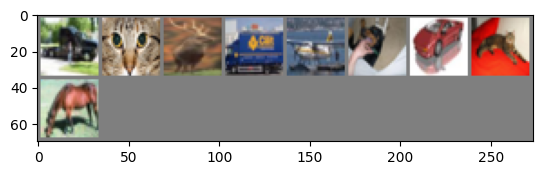

truck, cat, deer, truck, airplane, dog, automobile, cat, horse


In [11]:
train_iter = iter(train_loader)
images, labels = next(train_iter)
# Only need 9 images to display
images, labels = images[:9], labels[:9]
visualize_image(torchvision.utils.make_grid(images))
# print labels
lbs = (f'{classes[label_index]}' for label_index in labels)
print(', '.join(lbs))

In [12]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [23]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(16, 32, 3)
    self.fc1 = nn.Linear(32 * 6 * 6, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x

In [24]:
cnn = CNN()

In [25]:
# Transfer neural network to GPU
cnn.to(device)

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1152, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [26]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)

# **Training CNN**

In [27]:
for epoch in range(TOTAL_EPOCHS):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    images, labels = data

    # Transfer input and labels to GPU
    images, labels = images.to(device), labels.to(device)

    optimizer.zero_grad()
    out = cnn(images)
    loss = loss_function(out, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    # print statistics every 100th iteration
    if i % 100 == 99:
      print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}')
      running_loss = 0.0

print("Training Finished")

[1, 100] loss: 1.990
[1, 200] loss: 1.667
[1, 300] loss: 1.512
[1, 400] loss: 1.420
[1, 500] loss: 1.383
[2, 100] loss: 1.341
[2, 200] loss: 1.310
[2, 300] loss: 1.258
[2, 400] loss: 1.231
[2, 500] loss: 1.201
[3, 100] loss: 1.177
[3, 200] loss: 1.129
[3, 300] loss: 1.117
[3, 400] loss: 1.104
[3, 500] loss: 1.088
[4, 100] loss: 1.045
[4, 200] loss: 1.026
[4, 300] loss: 1.029
[4, 400] loss: 1.020
[4, 500] loss: 1.009
[5, 100] loss: 0.956
[5, 200] loss: 0.965
[5, 300] loss: 0.949
[5, 400] loss: 0.939
[5, 500] loss: 0.943
[6, 100] loss: 0.890
[6, 200] loss: 0.879
[6, 300] loss: 0.906
[6, 400] loss: 0.876
[6, 500] loss: 0.887
[7, 100] loss: 0.811
[7, 200] loss: 0.829
[7, 300] loss: 0.836
[7, 400] loss: 0.843
[7, 500] loss: 0.832
[8, 100] loss: 0.765
[8, 200] loss: 0.778
[8, 300] loss: 0.777
[8, 400] loss: 0.774
[8, 500] loss: 0.771
[9, 100] loss: 0.708
[9, 200] loss: 0.721
[9, 300] loss: 0.727
[9, 400] loss: 0.730
[9, 500] loss: 0.747
[10, 100] loss: 0.650
[10, 200] loss: 0.699
[10, 300] l

In [28]:
torch.save(cnn.state_dict(), MODEL_PATH)

# Model testing

In [29]:
test_iter = iter(test_loader)
images, labels = next(test_iter)
images, labels = images[:9], labels[:9]

In [30]:
# Load the saved model
test_model = CNN().to(device)
test_model.load_state_dict(torch.load(MODEL_PATH, weights_only=True))
test_model.eval() # to set dropout and normalization layer ready for evaluation - we don't really need this in our case

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1152, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [31]:
total = 0
correct = 0
with torch.no_grad():
  for data in test_loader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)

    outputs = test_model(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of model = {correct / total * 100}%')

Accuracy of model = 69.13%


In [32]:
# Find label-wise accuracy
total_per_class = torch.zeros(10)
correct_per_class = torch.zeros(10)
accuracy_per_class = torch.zeros(10)

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)

    outputs = test_model(images)
    _, predicted = torch.max(outputs, 1)
    for i in range(len(predicted)):
      pred_label = predicted[i].item()
      true_label = labels[i].item()

      total_per_class[pred_label] += 1
      if pred_label == true_label:
        correct_per_class[pred_label] += 1

  # calculate accuracy for every label
  accuracy_per_class = torch.nan_to_num((correct_per_class / total_per_class) * 100, nan=0.0)
  print("".join(
    f'Accuracy for {classes[i]} = {accuracy_per_class[i]:.2f}%\n'
    for i in range(total_per_class.size(0))
    ))

Accuracy for airplane = 70.84%
Accuracy for automobile = 79.03%
Accuracy for bird = 61.27%
Accuracy for cat = 50.38%
Accuracy for deer = 69.11%
Accuracy for dog = 59.06%
Accuracy for frog = 75.05%
Accuracy for horse = 66.83%
Accuracy for ship = 85.57%
Accuracy for truck = 76.39%

